In [1]:
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.5
Uninstalling protobuf-5.29.5:
  Successfully uninstalled protobuf-5.29.5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 4.1 MB/s eta 0:00:00a 0:00:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.26.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
grain 0.2.15 requires protobuf>=5.28.3, but you have protobuf 3.20.3 which is incompatible.
onnx 1.20.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
ray 2.52.1 requires click!=8.3.*,>=7.0, but you have click 8.3.1 which is incompatible.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
ydf 0.13.0 

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, AdamW
from sklearn.model_selection import train_test_split

2026-01-20 16:22:34.079361: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768926154.262898      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768926154.325013      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768926154.802593      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768926154.802634      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768926154.802637      55 computation_placer.cc:177] computation placer alr

In [3]:
base_dir = '/kaggle/input/dataset-preprocessed/Dataset_preprocessed'

In [4]:
mammo_dir = os.path.join(base_dir, 'mammo_processed')
us_dir = os.path.join(base_dir, 'ultra_processed')

In [5]:
labels_map = {'3597y17': 0, '0470y18': 0, '0919y18': 0, '0877y07': 1, '04138y20': 0, '1780y07': 0, '1238y19': 0, '2889y13': 0, '3679y19': 0, '4105y18': 0, '1636y14': 0, '01566y21': 1, '0072y16': 0, '2515y11': 0, '00506y21': 1, '1864y16': 0, '2462y19': 0, '4856y16': 0, '00717y20': 0, '04902y22': 1, '05439y20': 0, '2995y15': 0, '0505y09': 1, '01262y21': 1, '01698y21': 0, '3052y14': 0, '1193y16': 0, '1362y19': 0, '0103y17': 0, '00472y20': 0, '04583y20': 0, '0331y15': 1, '2429y17': 0, '3761y16': 0, '1859y17': 0, '9207y18': 1, '2880y19': 0, '1800y14': 0, '2758y19': 0, '1352y15': 0, '1000y17': 0, '4315y15': 0, '1322y17': 0, '02962y20': 0, '0546y16': 0, '00278y20': 1, '1724y16': 0, '1275y19': 0, '1400y15': 0, '02922y23': 0, '4908y16': 0, '3604y19': 0, '0646y19': 0, '2215y19': 0, '3384y18': 0, '2629y19': 0, '04412y22': 1, '02299y20': 0, '3399y16': 0, '1473y18': 0, '3915y18': 0, '0178y10': 0, '1291y17': 1, '2092y13': 0, '0829y18': 0, '1899y16': 0, '05891y20': 0, '2386y11': 0, '0193y16': 0, '2829y16': 1, '4397y15': 0, '3006y17': 0, '3962y18': 0, '00561y22': 1, '0021y19': 0, '3499y19': 0, '03913y21': 0, '0165y09': 0, '01615y21': 0, '1901y11': 0, '0740y17': 0, '3966y16': 0, '2769y18': 0, '02410y21': 0, '0441y19': 0, '02639y22': 0, '00603y20': 0, '06025y20': 1, '01921y21': 1, '1549y19': 0, '05804y22': 1, '4645y15': 0, '2786y19': 0, '4261y16': 0, '0568y19': 0, '2199y18': 0, '0581y11': 0, '1877y17': 0, '05463y21': 0, '2695y19': 0, '1777y11': 0, '1429y17': 1, '3201y15': 0, '3911y16': 0, '3741y18': 0, '02095y21': 0, '01880y20': 0, '1949y14': 1, '0413y16': 0, '00933y21': 0, '02264y20': 0, '1796y18': 0, '1112y15': 0, '02450y20': 0, '0812y15': 0, '01277y20': 0, '0115y14': 0, '2640y17': 0, '2226y18': 0, '2645y10': 0, '2150y18': 0, '2006y16': 0, '2599y11': 0, '2288y15': 0, '9357y18': 0, '1173y15': 1, '1594y19': 0, '3280y19': 0, '01113y20': 0, '03881y22': 0, '3677y17': 0, '3391y18': 0, '2233y16': 0, '0457y06': 0, '4987y16': 0, '2731y17': 0, '04364y20': 0, '02347y20': 0, '02500y22': 1, '2966y11': 0, '0721y18': 0, '02300y21': 0, '1692y12': 0, '02241y20': 1, '2445y19': 0, '3638y16': 0, '05186y20': 0, '2104y14': 0, '1217y09': 0, '0343y15': 0, '3736y19': 0, '2138y13': 0, '02654y20': 0, '2919y17': 0, '2024y19': 0, '2774y16': 0, '2837y13': 0, '02899y20': 0, '2254y14': 0, '3384y16': 1, '3284y18': 0, '00247y21': 1, '4584y15': 0, '1171y18': 0, '2738y19': 0, '1976y10': 0, '05176y20': 0, '4162y19': 0, '01172y23': 1, '1720y17': 0, '9639y18': 0, '1349y17': 0, '7281y18': 0, '2053y14': 0, '0585y12': 0, '3308y19': 0, '1019y18': 1, '01991y22': 0, '0065y15': 0, '0982y19': 0, '0529y15': 0, '05119y21': 0, '4012y15': 0, '2156y12': 0, '2705y19': 0, '4004y19': 0, '02377y21': 0, '0263y19': 0, '06671y20': 0, '05494y21': 0, '04376y19': 0, '1583y19': 0, '0249y16': 0, '2536y10': 0, '1083y07': 1, '02967y20': 0, '02570y20': 0, '4228y16': 0, '04436y19': 0, '01870y20': 0, '1141y18': 0, '3803y19': 0, '01271y23': 1, '3023y19': 0, '3855y19': 0, '03829y20': 1, '1767y15': 0, '0323y15': 0, '1946y18': 0, '1842y18': 0, '02137y20': 0, '3664y19': 0, '2099y15': 0, '04272y20': 0, '0802y11': 0, '1218y15': 0, '01281y21': 1, '1265y07': 0, '04837y20': 0, '4581y16': 0, '0609y09': 0, '2072y14': 0, '1938y10': 0, '2265y11': 0, '7848y19': 0, '0800y07': 0, '2358y14': 0, '1426y16': 1, '1893y15': 1, '3753y19': 0, '00263y23': 1, '3534y19': 0, '7708y18': 1, '2981y16': 1, '1619y19': 0, '3216y14': 0, '4578y16': 0, '1636y07': 0, '0544y16': 0, '8827y19': 0, '0957y11': 0, '0833y15': 0, '2101y17': 0, '5310y19': 0, '3944y18': 0, '2352y18': 0, '3779y15': 0, '04747y22': 1, '06511y20': 0, '4334y16': 0, '03835y20': 0, '04906y21': 0, '0016y11': 0, '2324y16': 0, '5049y16': 0, '0323y18': 0, '04409y22': 0, '00760y21': 0, '1537y19': 0, '2845y11': 0, '1532y18': 0, '4639y16': 0, '03128y21': 1, '04362y20': 0, '2935y14': 0, '2702y19': 0, '0618y16': 0, '3255y16': 0, '0423y18': 0, '1853y18': 0, '1196y19': 1, '2499y19': 0, '01668y21': 0, '3912y19': 0, '3557y15': 0, '06451y20': 0, '2833y11': 0, '3611y17': 0, '00951y21': 1, '1434y12': 0, '6054y19': 0, '1847y17': 0, '1610y19': 0, '0583y19': 0, '3936y18': 0, '1386y12': 1, '0950y19': 0, '1404y16': 0, '1447y18': 0, '2017y17': 0, '3480y18': 0, '02418y21': 0, '1677y19': 0, '4033y15': 0, '05365y20': 1, '2592y17': 0, '2227y17': 0, '00639y20': 0, '1769y15': 0, '03191y21': 1, '3195y19': 0, '2609y16': 0, '0055y17': 0, '2310y19': 0, '2327y19': 0, '2370y19': 1, '1608y18': 0, '3454y15': 0, '01131y20': 0, '06532y20': 1, '0284y14': 0, '1016y15': 0, '03964y22': 1, '1231y18': 0, '2782y16': 0, '4245y15': 0, '04422y20': 0, '3218y12': 0, '03911y20': 1, '3270y12': 0}

In [6]:
def get_data(d_path, l_map):

    fps = []
    lbs = []
    
    for i in os.listdir(d_path):
        p_folder = os.path.join(d_path, i)
        
        if not os.path.isdir(p_folder) or i not in l_map:
            continue
            
        label = l_map[i]
        for img in os.listdir(p_folder):
            if img.lower().endswith(('.png', '.jpg', '.jpeg')):
                fps.append(os.path.join(p_folder, img))
                lbs.append(str(label)) 
                
    return pd.DataFrame({'filename': fps, 'class': lbs})

In [7]:
m_df = get_data(mammo_dir, labels_map)
u_df = get_data(us_dir, labels_map)

In [8]:
len(m_df), len(u_df)

(1059, 1109)

In [9]:
m_df.iloc[0]

filename    /kaggle/input/dataset-preprocessed/Dataset_pre...
class                                                       0
Name: 0, dtype: object

In [10]:
m_df

,filename,class
0,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
1,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
2,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
3,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
4,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
...,...,...
1054,/kaggle/input/dataset-preprocessed/Dataset_pre...,1
1055,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
1056,/kaggle/input/dataset-preprocessed/Dataset_pre...,0
1057,/kaggle/input/dataset-preprocessed/Dataset_pre...,0


In [11]:
cl_m = m_df["class"].tolist()

In [12]:
cl_u = u_df["class"].tolist()

In [13]:
train_m, val_m = train_test_split(m_df, test_size=0.2, stratify=m_df['class'])
train_u, val_u = train_test_split(u_df, test_size=0.2, stratify=u_df['class'])

In [14]:
igen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [32]:
def make_gen(df, bs=40, shuffle=True):
    return igen.flow_from_dataframe(
        dataframe=df,
        x_col='filename',
        y_col='class',
        target_size=(512, 512), 
        batch_size=bs,
        class_mode='binary',
        shuffle=shuffle
    )

In [27]:
base = DenseNet121(weights='/kaggle/input/radimagenet-densenet121/keras/default/1/RadImageNet-DenseNet121_notop.h5', include_top=False, input_shape=(512,512,3))
#base.load_weights("/kaggle/input/radimagenet-densenet121/keras/default/1/RadImageNet-DenseNet121_notop.h5")

In [28]:
base.trainable = True

for layer in base.layers[:-30]:
    layer.trainable = False

In [17]:
base.trainable = False

In [ ]:
base.summary()
# Total params: 7,037,504 (26.85 MB)
# Trainable params: 641,408 (2.45 MB)
# Non-trainable params: 6,396,096 (24.40 MB)

In [21]:
from sklearn.utils import class_weight
import tensorflow.keras.backend as K

weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(cl_m), 
    y=cl_m
)
cwd_m = dict(enumerate(weights))

weights = class_weight.compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(cl_u), 
    y=cl_u
)
cwd_u = dict(enumerate(weights))

In [22]:
cwd_m, cwd_u

({0: np.float64(0.5976297968397292), 1: np.float64(3.060693641618497)},
 {0: np.float64(0.6432714617169374), 1: np.float64(2.2449392712550607)})

In [23]:
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.sum((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    return focal_loss_fixed
    

In [33]:
def finetune(train_df, val_df,base, mod_name):
    x = base.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(150, activation='relu')(x)
    x = Dropout(0.5)(x) 
    out = Dense(1, activation='sigmoid')(x)
    
    model = Model(inputs=base.input, outputs=out)
    

    model.compile(optimizer=AdamW(learning_rate=5e-5), 
                  loss=focal_loss(gamma=2.0, alpha=0.6), 
                  metrics=['accuracy', tf.keras.metrics.AUC(curve='PR', name='pr_auc')])
    
    t_gen = make_gen(train_df,shuffle=True)
    v_gen = make_gen(val_df, shuffle=False)
    
    hist = model.fit(t_gen, validation_data=v_gen, epochs=50, class_weight=cwd_u)
    
    save_path = f"{mod_name}_densenet_tuned.weights.h5"
    model.save_weights(save_path)
    print(f"saved to {save_path}")
    
    return model

In [ ]:
model_m = finetune(train_m, val_m, base, 'mammo')

In [34]:
model_u = finetune(train_u, val_u, base, 'ultra')

Found 887 validated image filenames belonging to 2 classes.
Found 222 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6812 - loss: 3.0201 - pr_auc: 0.2616 - val_accuracy: 0.7793 - val_loss: 2.5237 - val_pr_auc: 0.2934
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 713ms/step - accuracy: 0.7560 - loss: 2.6883 - pr_auc: 0.2387 - val_accuracy: 0.7793 - val_loss: 2.4927 - val_pr_auc: 0.3319
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 720ms/step - accuracy: 0.7045 - loss: 2.7723 - pr_auc: 0.3093 - val_accuracy: 0.7793 - val_loss: 2.4634 - val_pr_auc: 0.3541
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 721ms/step - accuracy: 0.7650 - loss: 2.6949 - pr_auc: 0.3715 - val_accuracy: 0.7838 - val_loss: 2.4456 - val_pr_auc: 0.3705
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 746ms/step - accuracy: 0.7425 - loss: 2.4554 - pr_auc: 0.3707 - val_accuracy: 0.7838 - val_loss: 2.4281 - val_pr_auc: 0.3939
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 717ms/step - accuracy: 0.7545 - loss: 2.4833 - pr_auc: 0.3556 - val_accuracy: 0.7838 - val_loss: 2.4178 - val_pr_auc: 0.4019
E

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [36]:
v_gen = make_gen(val_u)
y_pred_probs = model_u.predict(v_gen)
y_pred = (y_pred_probs > 0.5).astype(int)

Found 222 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step 


In [45]:
# 1. Re-create the generator strictly for evaluation
test_gen = make_gen(val_u, shuffle=False)

# 2. Get the predictions
y_pred_probs = model_u.predict(test_gen)
y_pred = (y_pred_probs > 0.4).astype(int)

# 3. Get the correct labels in the same order
y_true = test_gen.classes

# 4. Now the Classification Report will be accurate
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Found 222 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 497ms/step
              precision    recall  f1-score   support

           0       0.92      0.50      0.65       173
           1       0.32      0.84      0.47        49

    accuracy                           0.58       222
   macro avg       0.62      0.67      0.56       222
weighted avg       0.78      0.58      0.61       222



In [41]:
# 1. Re-create the generator strictly for evaluation
test_gen = make_gen(val_u, shuffle=False)

# 2. Get the predictions
y_pred_probs = model_u.predict(test_gen)
y_pred = (y_pred_probs > 0.5).astype(int)

# 3. Get the correct labels in the same order
y_true = test_gen.classes

# 4. Now the Classification Report will be accurate
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

Found 222 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 494ms/step
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       173
           1       0.40      0.47      0.43        49

    accuracy                           0.73       222
   macro avg       0.62      0.64      0.63       222
weighted avg       0.75      0.73      0.74       222



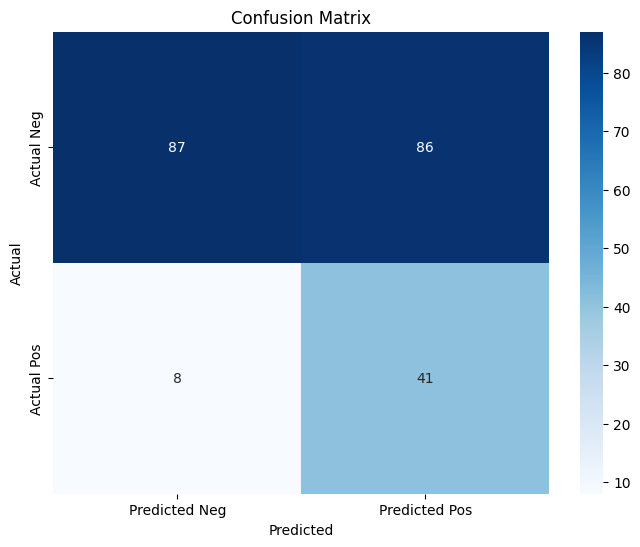

In [46]:


# 1. Get predictions from the validation generator
# Note: Ensure your make_gen(val_df) has shuffle=False for evaluation!


# 2. Get true labels from the generator

# 4. Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Neg', 'Predicted Pos'],
            yticklabels=['Actual Neg', 'Actual Pos'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()